# LOGISTIC REGRESSION
Results: we tested several models with different parameters and K-Fold-Cross validation. The differences between the performances were very minimal, but the best model had an ROC_AUC of 77% and an accuracy of 99%.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [3]:
data_train = pd.read_csv('training_processed.csv')
data_valid = pd.read_csv('validation_processed.csv')

labels_train = data_train['ACTIVE']# ground truth labels
features_train = data_train.drop(['ACTIVE'], axis=1) 
labels_valid = data_valid['ACTIVE']# ground truth labels
features_valid = data_valid.drop(['ACTIVE'], axis=1)

In [7]:
logisticRegr = LogisticRegression()
logisticRegr_parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}

cross_val = KFold(n_splits=5)
logistic_Regr_grid_search = GridSearchCV(estimator=logisticRegr, param_grid=logisticRegr_parameters, cv=cross_val, scoring=['roc_auc','accuracy'], refit='roc_auc')
logistic_Regr_grid_result = logistic_Regr_grid_search.fit(features_train, labels_train)
# summarize results
print("Best: %f using %s" % (logistic_Regr_grid_result.best_score_, logistic_Regr_grid_result.best_params_))
print("Average AUC for Logistic Regression: ", np.mean(logistic_Regr_grid_result.cv_results_['mean_test_roc_auc']))
print("Average Accuracy for Logistic Regression: ", np.mean(logistic_Regr_grid_result.cv_results_['mean_test_accuracy']))

Best: 0.769665 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Average AUC for Logistic Regression:  0.768347077175375
Average Accuracy for Logistic Regression:  0.9888110488850133


In [ ]:
results = pd.DataFrame(logistic_Regr_grid_result.cv_results_)

[Text(0.5, 1.0, 'ROC_AUC of Logistic Regression with K-Fold-Cross Validation\n')]

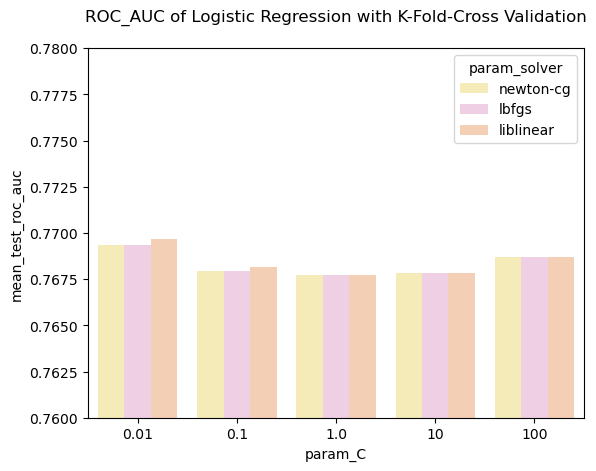

In [38]:
plot = sns.barplot(data=results, x='param_C', y='mean_test_roc_auc', hue='param_solver', palette='Pastel2_r')
plot.set(ylim=(0.76, 0.78))
plot.set(title='ROC_AUC of Logistic Regression with K-Fold-Cross Validation\n')

[Text(0.5, 1.0, 'Accuracy of Logistic Regression with K-Fold-Cross Validation\n')]

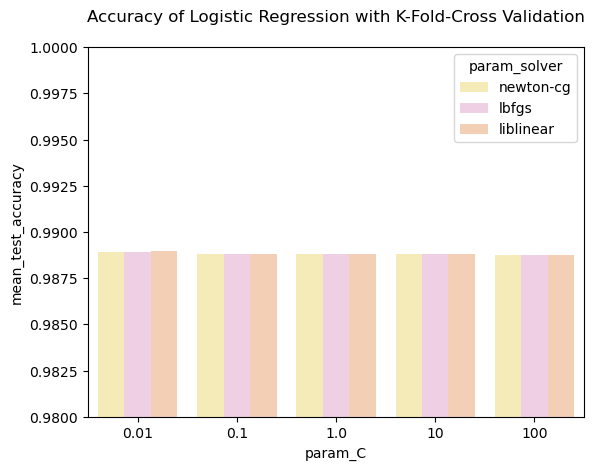

In [39]:
plot = sns.barplot(data=results, x='param_C', y='mean_test_accuracy', hue='param_solver', palette='Pastel2_r')
plot.set(ylim=(0.98, 1))
plot.set(title='Accuracy of Logistic Regression with K-Fold-Cross Validation\n')

In [9]:
#combing models
#combining models
from sklearn.ensemble import AdaBoostClassifier

# naive_bayes_ensm = GaussianNB(var_smoothing=0.1)
# adb = AdaBoostClassifier(base_estimator=naive_bayes_ensm, n_estimators=10, learning_rate=0.1)
# adb.fit(features_train, labels_train)
# adb_pred = adb.predict(features_valid)
# adb_pred_prob = adb.predict_proba(features_valid)
# adb_auc = roc_auc_score(labels_valid, adb_pred_prob[:,1])
# print("AUC for Naive Bayes with AdaBoost: ", adb_auc)

logistic_regression_ensb = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
adb = AdaBoostClassifier(base_estimator=logistic_regression_ensb, n_estimators=50, learning_rate=0.01)
adb.fit(features_train, labels_train)
adb_pred = adb.predict(features_valid)
adb_pred_prob = adb.predict_proba(features_valid)
adb_auc = roc_auc_score(labels_valid, adb_pred_prob[:,1])
print("AUC for Logistic Regression with AdaBoost: ", adb_auc)
print("Accuracy for Logistic Regression with AdaBoost: ", adb.score(features_valid, labels_valid))

AUC for Logistic Regression with AdaBoost:  0.7125686802226139
Accuracy for Logistic Regression with AdaBoost:  0.9887879175732753


C=0.01, penalty='l2', solver='liblinear'

n_estimators=10, learning_rate=0.1
AUC for Logistic Regression with AdaBoost:  0.7126202801575021
Accuracy for Logistic Regression with AdaBoost:  0.9887879175732753

n_estimators=50, learning_rate=0.1
AUC for Logistic Regression with AdaBoost:  0.7131090314308031
Accuracy for Logistic Regression with AdaBoost:  0.9887879175732753

n_estimators=100, learning_rate=0.1
AUC for Logistic Regression with AdaBoost:  0.7137215516200901
Accuracy for Logistic Regression with AdaBoost:  0.9887879175732753

...............................

n_estimators=10, learning_rate=0.01
AUC for Logistic Regression with AdaBoost:  0.712518262416818
Accuracy for Logistic Regression with AdaBoost:  0.9887879175732753


n_estimators=50, learning_rate=0.01
AUC for Logistic Regression with AdaBoost:  0.7125686802226139
Accuracy for Logistic Regression with AdaBoost:  0.9887879175732753

n_estimators=100, learning_rate=0.01
AUC for Logistic Regression with AdaBoost:  0.7126300918289701
Accuracy for Logistic Regression with AdaBoost:  0.9887879175732753